# A/B Testing - Pt. 1

### What is A/B testing?
Whether adding a new feature to a product or trying a new form of online advertising we need to know if a change we're going to make is going to make a imapact, usually we hope this will be in a positive direction and increase some metric of interest click through rate, conversions etc. When running an A/B test experiment we need to use some statistical significance test, generally a hypothesis test (depending on what it is we wish to test), to truely prove the effect and ensure the results we observe are not caused by chance variation.

### Hypothesis Testing
When testing a hypothesis we have a __null hypothesis__ which will account for all scenarios that the __alternate hypothesis__ does not account for. The null hypothesis will essentially embody the notion that nothing special is happening (there is no effect), so in the simple case of changing the color of a button we might hypothesise that the new color increases clicks (our alternate hypothesis), our null will be that it performs worse or the same.

We usually use notation to express these hypothesis as:

$H_0$: $\mu \geq \overline{X}$

$H_A$: $\mu < \overline{X}$

where:
  -  $\mu$ is the population mean.
  -  $\overline{X}$ is the sample mean.

![title](img/samp.png)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [12]:
display(HTML("""
<style>
.output {
    display: flex;
    align-items: justify;
    text-align: justify;
}
</style>
"""))

<Figure size 432x288 with 0 Axes>

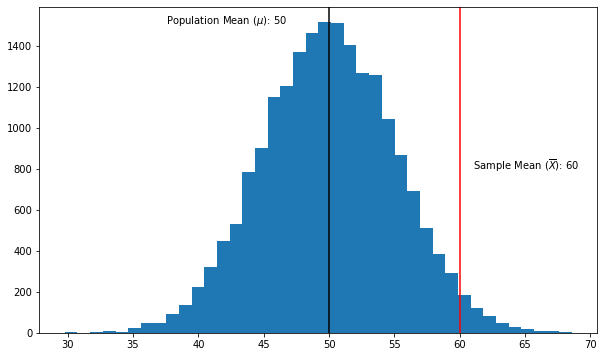

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

p = 0.5
n = 100

mu = p * n
sigma = (n * p * (1 - p))**0.5

population_data = np.random.normal(mu, sigma, 20000)

plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(population_data, 40, histtype='bar', label='Population')
plt.axvline(0.6*100, color='red', label='Sample')
plt.axvline(mu, color='black', label='Population')
min_ylim, max_ylim = plt.ylim()
plt.text(mu*.75, max_ylim*0.95, f'Population Mean ($\mu$): {int(mu)}')
plt.text(mu*1.22, max_ylim*0.5, 'Sample Mean ($\overline{X}$): 60')
plt.show()

In this example we're comparing a sample mean ($\overline{X}$) to a population mean ($\mu$), which is a hypothesis test we might perform if we know the population parameters $\mu, \sigma$, but our A/B is a comparison of 2 or more sample means so our hypothesis is something more like:

$H_0$: $\mu_{control} \geq \mu_{treatment} $

$H_A$: $\mu_{control} < \mu_{treatment}$

_NOTE: We initially used $\mu$ to denote the population mean, going forward it will just represent the sample mean._

![title](img/pop.png)

Where our test groups are randomly assigned and our control gets the existing button and the treatment group gets the new version. To compare these two populations we take the sample mean or proportion (eg. click thorugh rate or click through probability) and compare. If the size of the difference exceeds some significance threshold ($\alpha$) then we can reject the null hypothesis and conclude that the result is not due to chance variation and is statistically significant. We call a hypothesis test like this a two sample test.

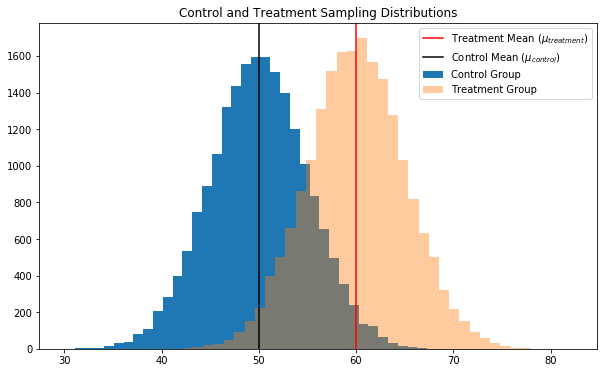

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

p = 0.5
n = 100

mu = p * n
sigma = (n * p * (1 - p))**0.5

control_data = np.random.normal(mu, sigma, 20000)
treatment_data = np.random.normal(60, 5, 20000)

plt.figure(figsize=(10, 6))
plt.hist(control_data, 40, histtype='bar', label='Control Group')
plt.hist(treatment_data, 40, histtype='bar', label='Treatment Group', alpha=0.4)
plt.axvline(0.6*100, color='red', label='Treatment Mean ($\mu_{treatment}$)')
plt.axvline(mu, color='black', label='Control Mean ($\mu_{control}$)')
min_ylim, max_ylim = plt.ylim()
plt.title("Control and Treatment Sampling Distributions")
plt.legend()
plt.show()

### Z-tests & T-tests

There are two main type of statistical tests we use for hypothesis testing with 1 or 2 samples. This the z-test and t-test. Generally we use t-tests if we have a small sample size < 30 or if we do not know the population parameters ($\sigma, \mu$). The t-distribution for which we use to determine critical values is more conservative than the z, it has fatter tails as we expect that when n is small the variance will be large so distribution spreads probability wider and is less concentrated around the mean. However when n is large the t-distribution approximates the z-distribution (normal distribution).

Generally in A/B tests we do not know the population parameters because most the time we are running the expermient with the randomly assigned experiemntal groups, testing under the same conditions, but with on or more groups exposed to some different treatment. However, in large web experiments you will often see the z-test used, this is simply because as n becomes large the t-distribution approximates the z so you may see examples of both being used and if n is large the results should be quite similar.

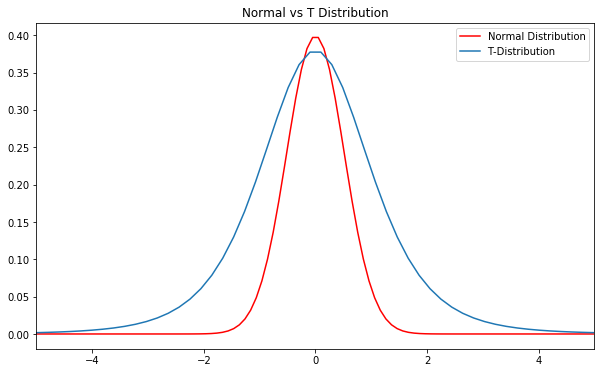

In [5]:
from scipy.stats import t, norm

rv = t(df=5, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x)
x_norm = np.linspace(-5,5,100)
nd = norm.pdf(x)
plt.figure(figsize=(10, 6))
plt.plot(x_norm, nd, color='red', label='Normal Distribution')
plt.xlim(-5,5)
plt.plot(x,y, label='T-Distribution')
plt.title("Normal vs T Distribution")
min_ylim, max_ylim = plt.ylim()
plt.legend()
plt.show()

### One way, Two way Tests
As the intial example outlined often we want to know if some treatment will increase or decrease some metric. To prove that a result is significant and to not be fooled by the new treatment we have to formulate our hypothesis to support this.

In a one way test we are interested in a treatment that either has a:

__Positive effect__ (treatment mean is greater than the control):

$H_0$: $\mu_{control}  \geq \mu_{treatment} $

$H_A$: $ \mu_{control} < \mu_{treatment} $

__Negative effect__ (treatment mean is less than the control):

$H_0$: $\mu_{control}  \leq \mu_{treatment} $

$H_A$: $ \mu_{control} > \mu_{treatment} $

In one way test we are often comparing a well test baseline or existing solution to something new. There is always a chance when using a one way test that we might miss an effect going the opposite direction.

Two way tests are more concervative and try to ensure we don't get fooled in either direction.

$H_0$: $\mu_{control}  = \mu_{treatment} $

$H_A$: $ \mu_{control} \neq \mu_{treatment} $

There is some debate around what we should use in A/B tests, One way v Two way, often one way fits the nature of A/B tests given we usually run experiments to see if a new feature or product change performs better than the existing, however lots of testing software uses two way as it is more conservative (eg. $\alpha$ = 0.05 gets spread between 2 tails (0.025 in each) instead of one).

### Critical Values, Alpha ($\alpha$) and The Normal Distribution
Critical values are determined by using the significance threshold (refered to as $\alpha$, generally $\alpha=0.05$) we set to ensure we aren't tricked by chance variation (try to ensure we don't make a type 1 error - reject the null when the null is true). Now we can either calculate the critical value using an inverse cdf function or we can use a generic table thats commonly available.

Before we go into the normal distribution we need to be aware of the theorm that underpins why we use the normal distribution that is very important, that is the __Central Limit Theorm__ (CLT). The CLT is one of the most import theories in statistics, and is critical for hypothesis testing. The key points of the CLT:
-  The distribution of sample means is approximately normal.
-  The standard deviation of sample means $\approx \frac{\sigma}{\sqrt{n}}$
-  The mean of the sample mean is $\approx \mu$

So in other words, the relation this has to all we've mentioned is that if we have a distribution of sample means we can determine whether a given sample mean is weird or not by where it lies on that distribution. If a random variable (RV) defined as the average of a large number of idependent and identically distributed RVs, is itself approximately normally distributed, despite shape of the original population distribution. This is a very important for hypothesis testing and for statistical inference.

While we're at this point let's do a tiny bit of background on the normal distribution (often denoted $N(\mu, \sigma^2)$).

Hopefully you've seen the common bell shaped curve which has the __probability density function (PDF)__:

$f(x|\mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)\,    \hspace{20pt}$

in code:
```python
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))
```

We can visualize an alpha of 0.05 of a normal distribution, and the location of the critical reigon depends upon the type of test you are running, below we show a one way test. Any result to the right of our critical value ($\alpha = 0.05$) would be statistically significant.

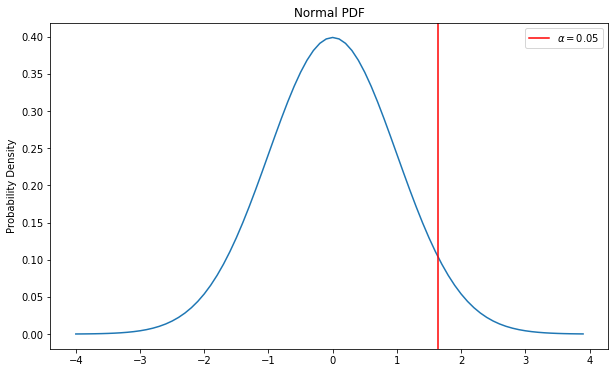

In [6]:
import math

def normal_pdf(x, mu, sigma):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

x = [x / 10.0 for x in range(-40, 40)]

plt.figure(figsize=(10, 6))
plt.plot(x,[normal_pdf(i, 0, 1) for i in x])
plt.axvline(1.645, color='red', label='$\\alpha=0.05$')
plt.legend()
plt.title("Normal PDF")
plt.ylabel("Probability Density")
plt.xlabel("Z")
plt.show()

The PDF encompasses the probability that a variate has the value x. The PDF is a continuous function/distribution, meaning that a single point on the probability distribution will be zero (the total probability 1, is the area under the curve, a line has no area), so generally we need to find the integral (area under the curve) to estimate the probability that x is within some range. For our hypothesis tests, our alpha values related to probability density, for our example one way test at $\alpha = 0.05$, the critical region encompases 5% of the probability density.

When $\sigma = 1$ and $\mu = 0$, this distribution is called the __standard normal distribution__ (often denoted $N(0, 1)$). 

If $Z$ is a standard normal random variable, with $\mu$ (mean) and $\sigma$ (standard deviation) ($N(0, 1)$), and $X$ is a general normal random variable $N(\mu, \sigma^2)$, $X$ is just a scaled and shifted normal random varialble:

$X = \sigma Z + \mu$ in other words, this can be seen as a representation of random variable $X$ where $Z$ is the standard normal random variable.

If $X$ is a normal random variable with $\mu$ (mean) and $\sigma$ (standard deviation) then we can convert or __standardize__ $X$ to a standard normal random variable $Z$ by:

$Z =  \displaystyle \frac{(X - \mu)}{\sigma}$

Let's look at this a little further, just to clarify. To do this we'll use binomial random variables, which has two parameters n and p. A Binomial(n,p) random variable is simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability p and 0 with probability $1 - p$:

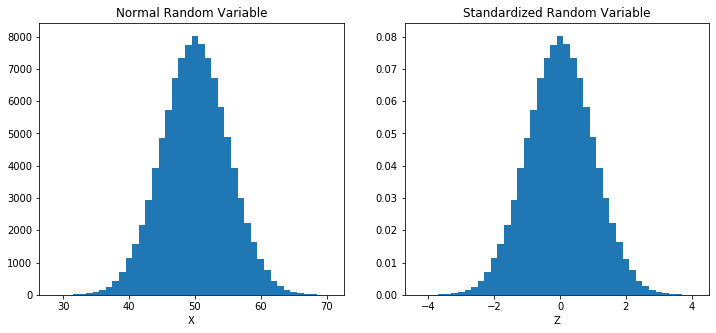

In [24]:
import random, collections

def bernoulli(p):
    return 1 if random.random() < p else 0

def binomial(p, n):
    return sum(bernoulli(p) for _ in range(n))

p = 0.5
n = 100
repeats = 100000

X = [binomial(p, n) for _ in range(repeats)]
freqs = collections.Counter(X)

mu = p * n
sigma = (n * p * (1 - p))**0.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.bar([x for x in freqs.keys()], [v for v in freqs.values()], 1)
ax1.set_title('Normal Random Variable')
ax1.set_xlabel('X')
ax2.bar([round((x - mu)/sigma, 1) for x in freqs.keys()], [v / repeats for v in freqs.values()], 0.2)
ax2.set_title('Standardized Random Variable')
ax2.set_xlabel('Z')
plt.show()

### Fitting our normal PDF to our experiment data.

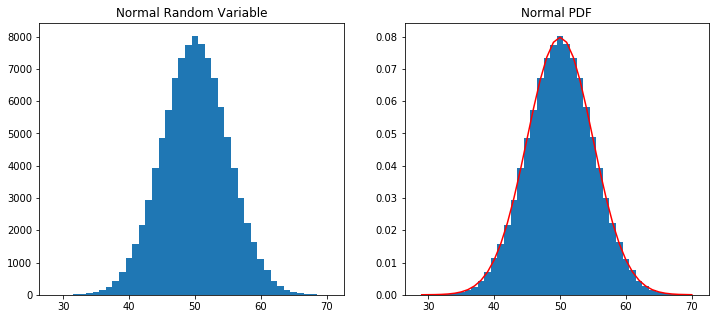

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
plt.plot(sorted(X),[normal_pdf(i, mu, sigma) for i in sorted(X)], color='red')
ax1.bar([x for x in freqs.keys()], [v for v in freqs.values()], 1)
ax1.set_title('Normal Random Variable')
ax2.bar([x for x in freqs.keys()], [v / repeats for v in freqs.values()], 1)
ax2.set_title('Normal PDF')
plt.show()

The __cumulative distribution function (CDF)__ gives us the cumulative probabilty associated with a function. The CDF gives us the probability that a variable takes on a value less that or equal to the x. For the normal distribution is not as straightforward to write but we can code it as:

```python
def cdf_normal_dist(x: float, mu: float, sigma: float) -> float:
    return (1 + math.erf((x - mu) / 2**0.5 / sigma)) / 2
```
$CDF: F(x) = P[X \leq x]$

In other words we can map a given z score to a probability.  $Z \to P$

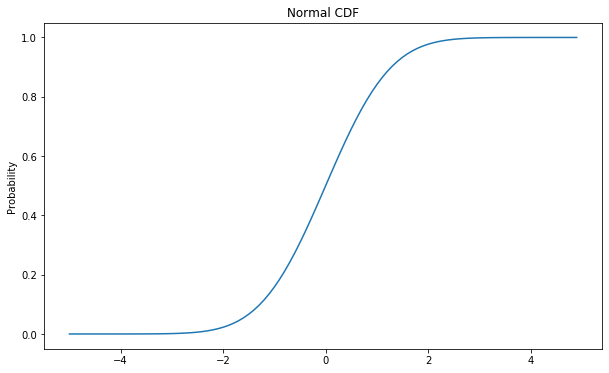

In [80]:
def cdf_normal_dist(x: float, mu: float, sigma: float) -> float:
    return (1 + math.erf((x - mu) / 2**0.5 / sigma)) / 2

x = [x / 10.0 for x in range(-50, 50)]

plt.figure(figsize=(10, 6))
plt.plot(x,[normal_cdf(i, 0, 1) for i in x])
plt.title("Normal CDF")
plt.ylabel("Probability")
plt.show()

In [88]:
cdf_normal_dist(1.645, 0, 1)

0.9500150944608786

### Now, the CDF of our observed experiment data.

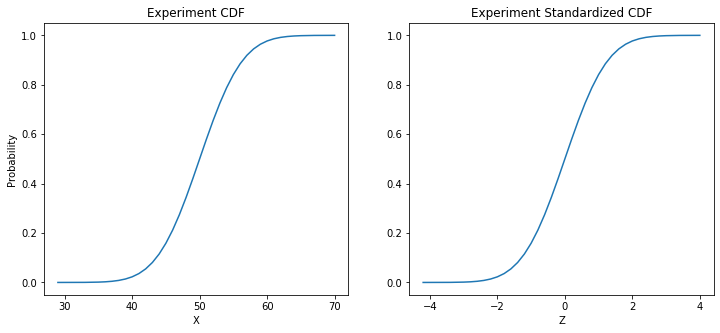

In [82]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
ax1.plot(sorted(X),[cdf_normal_dist(i, mu, sigma) for i in sorted(X)])
ax1.set_title('Experiment CDF')
ax1.set_xlabel('X')
ax1.set_ylabel('Probability')
ax2.plot([(x-mu)/sigma for x in sorted(X)],[cdf_normal_dist(i, mu, sigma) for i in sorted(X)])
ax2.set_title('Experiment Standardized CDF')
ax2.set_xlabel('Z')
plt.show()

To go the other way we use the __Inverse CDF__ (or quantile function) which tells us what $X$ would make some $F(X)$ return some $P$, $P \to Z$. 

The inverse CDF function is only a simple binary search using probabilities and Z-scores (we use our cdf function to get the probability for each mid Z point we search) and is an approximation.

In [79]:
def quantile_function(prob: float, mu: float = 0, sigma: float = 1):
    # If not standard normal we'll normalize the result.
    if mu != 0 or sigma != 1:
        return (mu + sigma) * quantile_function(prob)
    # Use binary search to find the z that matches our prob.
    # Our probability interval is of course (0, 1).
    l_p = 0
    r_p = 1
    # Our Z interval is (-12, 12).
    l_z = -12.00
    r_z = 12.00
    while l_z <= r_z:
        mid = l_z + (r_z - l_z) / 2
        # Calculate the probability of our mid.
        p_mid = cdf_normal_dist(mid, mu, sigma)
        # If the mid prob is < our target, target must be to the right.
        if p_mid < prob:
            l_p, l_z = p_mid, mid
        # If the mid prob is > our target, target must be to the left.
        elif p_mid > prob:
            r_p, r_z = p_mid, mid
        # Else mid prob == target, return the z.
        else:
            return mid
        
quantile_funtion(0.95)

1.6448536269514729

In another post we'll look at these functions again and run some simulation experiments.

### Why A/B test?

We have to prove that our change (or our hypothesis) has a significant difference, humans are very succeptable to believing changes that are simply due to chance variation, so we must rule this out. We can asses the probability of achieving a result as significant as the one obtained in the experiment by calculating a p-value, which by definition, given a chance model that embodies the null hypothesis, is the probability of obtaining a result as or more extreme than the observed.

Doing a controlled experiments such as an A/B allows us infer things about our overall population. For example, if we run and A/B test we can calculate at __Confidence Interval (CI)__ that at some level of confidence tells us the range of where the population mean would lie, so we can make statements like "given the new treatment x which at 95% confidence we'd expect the population mean to be between X & Y." aka there's a 95% chance the population mean would be within the range X, Y.

### Parametric & Non-Parametric
Calculating results from A/B tests can be done using two main methodologies;
-  __Parametric/Statistically:__ Here we use methods that make underlying assumptions about distributions (eg. the population is normally distributed) and we use reference tables to perform calculations to determine the significance of our results.
-  __Non-Parametric/Emperically:__ We run resampling methods with the results obtained to make the calculations (eg. exact tests).

So which to choose? Both! The parametric methods were vital in earlier years, but with modern computing we can run non-parametric methods quickly! We can compare results from both and hope they align, if they don't this might suggest there is something wrong and further investigationing should be done!

### When should we consider Bandits instead?

When considering running an A/B test there are a number of things we should think about before the start preparing for the experiment. One of the big things to consider is whether we actually need an A/B test, whether we can actually run an A/B experiement properly and whether implementing a MAB instead might be a better choice for our experimentation framework.

  1. What are we hoping to achieve with the A/B test?
    - Are we hoping to try to answer a research questions or are we hoping to select a purely optimimal solution?
        - An A/B test is the right framework to use if we are hoping to validate a hypothesis.
        - A MAB will help us determine the most optimal treatment/solution.
  2. Do the requirements for a proper A/B test experiment align with what the experiment setting?
    - Eg. does the website/service etc. have enough traffic with a suffice/allowable time window to reach significance?
    - If sizing doesn't fit the significance requirements does increasing the minimum effect size, power or alpha make sense, can we change our unit of diversion? 
  3. Are we okay with the with exposing a significant proportion of the population to a potentially negative treatment?
    - With A/B we randomly split test subjects into two or more groups, if one of the treatments has a negative effect there can be a significant cost associated the most obvious example is loss of business/users etc, dissatified with their experience.
    - With a MAB we are dynamically allocating test subjects between optimal and potentially optimal solutions (exploitation and exploration) this means that we can hopefully earn while we learn given that we allocating more subjects to the most optimal solution while routinely exploring other treatments to ensure we've converged to the optimal treatment.